### You are asked to develop a solution that would predict what would be the right dosage for a new patient for clinical trial XYZ

### To help you, you are provide with two CSV files:

1) 10,000 rows of result data indicating if the dosage was effective, not effective, or had side effect with patient profile

2) a 500 row file that will be your validation data.  Please do not use this until you have a prediction model

### You plan to create a ML model...

Here is a VERY high level overview using dummy trial data

1) prepare data into train and test sets

2) define your model

3) train the mdoel using train data and check against the test data

4) verify the model against the validation data. Check the accuracy for each result

### We will use classical artificial neural network to desing our model:

The artificial neural network as an input layer, a hidden layer, and output layer

![sample](ann.png)


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

### let's read in the CSV file containing the 10000 result 'data.csv' and check the content

The data have been already "normalized" for you

In [58]:
df = pd.read_csv('data.csv')
print('rows of data:', df.shape[0])
df.head(10)

rows of data: 10000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.6,0.0,1.0,0.0,0.2,0.40,0.60,0,1,0
1,0.4,0.0,0.0,1.0,0.4,0.25,0.21,0,1,0
2,0.6,0.0,0.0,1.0,0.7,0.25,0.60,0,1,0
3,0.2,1.0,0.0,0.0,0.4,0.90,0.21,0,1,0
4,0.3,1.0,0.0,0.0,0.9,0.90,0.70,0,1,0
5,0.9,1.0,0.0,0.0,0.4,0.60,0.70,0,0,1
6,0.1,1.0,0.0,0.0,0.7,0.50,0.50,0,1,0
7,0.6,1.0,0.0,0.0,0.2,0.80,0.60,0,1,0
8,0.9,1.0,0.0,0.0,0.2,0.60,0.70,0,0,1
9,0.0,1.0,0.0,0.0,0.9,0.90,0.21,0,1,0


### To train a model, we will need to split the data into training data and test data

Usually you leverage about 80% of classified data as train and 20% as test

In [59]:
train=df.sample(frac=0.8)
test=df.drop(train.index)

In [60]:
print('train data size:', train.shape[0])
train.head(10)

train data size: 8000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
3649,0.4,0.0,1.0,0.0,0.2,0.90,0.21,1,0,0
5774,0.6,1.0,0.0,0.0,0.6,0.70,0.21,0,1,0
4100,0.0,1.0,0.0,0.0,0.8,0.90,0.30,0,1,0
3554,0.5,1.0,0.0,0.0,0.2,0.70,0.70,0,1,0
6145,0.5,1.0,0.0,0.0,0.6,0.90,0.90,0,1,0
1746,0.0,0.0,0.0,1.0,0.8,0.60,0.30,0,1,0
4071,0.3,0.0,1.0,0.0,0.5,0.70,1.00,1,0,0
9838,0.4,0.0,0.0,1.0,0.9,0.70,0.60,0,1,0
9766,0.6,1.0,0.0,0.0,0.9,0.25,0.70,0,1,0
1641,0.6,0.0,1.0,0.0,0.5,0.30,0.21,0,1,0


In [61]:
print('test data size:', test.shape[0])
test.head(10)

test data size: 2000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
9,0.0,1.0,0.0,0.0,0.9,0.90,0.21,0,1,0
13,0.1,0.0,0.0,1.0,0.2,1.00,0.30,0,1,0
15,0.5,0.0,0.0,1.0,0.2,0.60,1.00,0,1,0
16,0.9,0.0,0.0,1.0,0.2,0.25,0.50,0,0,1
17,0.9,0.0,1.0,0.0,0.2,0.90,1.00,0,1,0
22,0.6,0.0,1.0,0.0,0.8,0.70,0.90,1,0,0
24,0.3,0.0,1.0,0.0,0.3,0.90,0.50,0,1,0
34,0.6,1.0,0.0,0.0,0.5,0.60,0.50,0,1,0
43,0.0,1.0,0.0,0.0,0.7,1.00,0.21,0,1,0
45,0.8,1.0,0.0,0.0,0.4,0.80,0.21,0,0,1


### The train data should be extracted out as x,y where y only contains the result

In [62]:
train_x = train.iloc[:,:7]
train_x.head(10)

,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80)
3649,0.4,0.0,1.0,0.0,0.2,0.90,0.21
5774,0.6,1.0,0.0,0.0,0.6,0.70,0.21
4100,0.0,1.0,0.0,0.0,0.8,0.90,0.30
3554,0.5,1.0,0.0,0.0,0.2,0.70,0.70
6145,0.5,1.0,0.0,0.0,0.6,0.90,0.90
1746,0.0,0.0,0.0,1.0,0.8,0.60,0.30
4071,0.3,0.0,1.0,0.0,0.5,0.70,1.00
9838,0.4,0.0,0.0,1.0,0.9,0.70,0.60
9766,0.6,1.0,0.0,0.0,0.9,0.25,0.70
1641,0.6,0.0,1.0,0.0,0.5,0.30,0.21


In [63]:
train_y = train.iloc[:,7:]
train_y.head(10)

,effective,no effect,side effect
3649,1,0,0
5774,0,1,0
4100,0,1,0
3554,0,1,0
6145,0,1,0
1746,0,1,0
4071,1,0,0
9838,0,1,0
9766,0,1,0
1641,0,1,0


### let's do the same for test data sets

In [64]:
test_x = test.iloc[:,:7]
test_y = test.iloc[:,7:]

###  lets use keras to train a model... first convert pandas dataframe to numpy array

In [65]:
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

### let's check for bias in the training data

count for: 0 906.0
count for: 1 5979.0
count for: 2 1115.0
0=effective, 1=no effect, 2=showing side effect


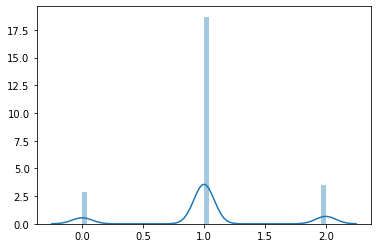

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    
sns.distplot(single_y)
for i in range(3):
    print('count for:',i,single_y_count[i])
    
print('0=effective, 1=no effect, 2=showing side effect')

### Because there are more data tied to 1.0 => which means no effect, the model will be trained to predict "no effect" more than "effective" or "side effect"

### let's train a model


In [67]:
from tensorflow import keras

In [68]:
x_train.shape
data_size = x_train.shape[1]

In [69]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(64, input_shape=(data_size,), activation='relu'))

#output layer
model.add( keras.layers.Dense(3, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [70]:
fit_history = model.fit(x_train, y_train,
  epochs=50 ,
  batch_size=200,
  validation_data=(x_test,y_test)
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 0s 20us/sample - loss: 0.9364 - acc: 0.6206 - val_loss: 0.7419 - val_acc: 0.7500
Epoch 2/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.6839 - acc: 0.7474 - val_loss: 0.6371 - val_acc: 0.7500
Epoch 3/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.6000 - acc: 0.7474 - val_loss: 0.5645 - val_acc: 0.7500
Epoch 4/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5337 - acc: 0.7480 - val_loss: 0.5063 - val_acc: 0.7520
Epoch 5/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4806 - acc: 0.7589 - val_loss: 0.4621 - val_acc: 0.7740
Epoch 6/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4414 - acc: 0.7804 - val_loss: 0.4292 - val_acc: 0.7880
Epoch 7/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4120 - acc: 0.7966 - val_loss: 0.4059 - val_acc: 0.7990

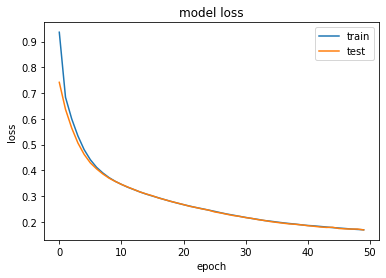

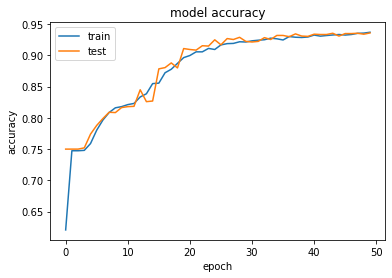

In [71]:


# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

### this simple model is predicting about 93% accuracy. Let's check against our validation set

In [72]:
val = pd.read_csv('validation.csv')
print('validation dataset:',val.shape[0])
val.head(10)

validation dataset: 500


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.0,0.0,0.0,1.0,0.5,0.30,0.80,0,1,0
1,0.7,0.0,0.0,1.0,0.3,0.80,0.21,0,1,0
2,0.5,1.0,0.0,0.0,0.6,0.25,0.21,0,1,0
3,0.4,0.0,1.0,0.0,0.4,0.90,0.21,1,0,0
4,0.8,0.0,1.0,0.0,0.9,0.60,0.60,0,1,0
5,0.8,0.0,1.0,0.0,0.3,0.25,0.50,0,1,0
6,0.3,0.0,0.0,1.0,0.2,0.25,0.50,0,1,0
7,0.3,0.0,1.0,0.0,0.2,0.50,0.21,1,0,0
8,0.7,0.0,1.0,0.0,0.2,0.80,0.80,0,1,0
9,0.9,1.0,0.0,0.0,0.4,0.40,0.21,0,0,1


In [73]:
x_val = (val.iloc[:,:7]).values
y_val = (val.iloc[:,7:]).values
y_val

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [74]:
loss, acc = model.evaluate(x_val ,y_val)
print('acc:',acc , 'loss:',loss)

500/500 [==============================] - 0s 18us/sample - loss: 0.1712 - acc: 0.9320
acc: 0.932 loss: 0.1712052643299103


In [75]:
predictions = model.predict(x_val)
my_matrix = np.zeros( (3,3), dtype='int')

# count of good guesses
count_matrix = np.zeros( (3,), dtype='int')
good_matrix = np.zeros( (3,), dtype='int')

# iterate through 10,000 test data
for i in range(val.shape[0]):
    expected = np.argmax(y_val[i])
    count_matrix[expected] +=1
    guess = np.argmax(predictions[i])
    if guess == expected:
        good_matrix[guess] +=1
    else:
        my_matrix[expected][guess] +=1
    
# show good matrix
print('Good guesses: 0=effective, 1=no effect, 2=side effect')
for i in range(3):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses: 0=effective, 1=no effect, 2=side effect
match count for: 0 = 58 / 60 ( 96.67 %)
match count for: 1 = 355 / 368 ( 96.47 %)
match count for: 2 = 53 / 72 ( 73.61 %)


### As expected, the model is more accurate with the "no effect" prediction than the "effective" and "side effect"

### Lets see where the model failed:  what was expected vs how model predicted


Confusion Matrix: 0=effective, 1=no effect, 2=side effect


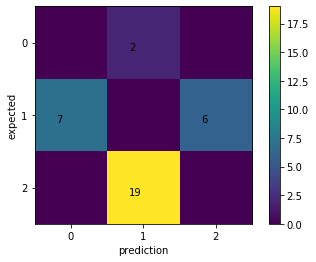

In [76]:
print('\nConfusion Matrix: 0=effective, 1=no effect, 2=side effect')

fig = plt.figure()
plt.xticks( range(3))
plt.yticks( range(3))

for y in range(3):
    for x in range(3):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix)
plt.colorbar()
plt.show()
plt.close()

### How can we make the model better? by providing a better training data set

We will try to make the count of each result about the same

There were abut 1000 counts of effective and side effect results when we allocated 80% of data for training.. so we will resplit the data to reduce reprsentation of "1" train data


In [77]:
df = pd.read_csv('data.csv')
train=df.sample(frac=0.95)
test=df.drop(train.index)
train_x = train.iloc[:,:7]
train_y = train.iloc[:,7:]
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    

for i in range(3):
    print('count for:',i,single_y_count[i])
    

count for: 0 1087.0
count for: 1 7086.0
count for: 2 1327.0


count for: 0 1087.0
count for: 1 1630.0
count for: 2 1327.0


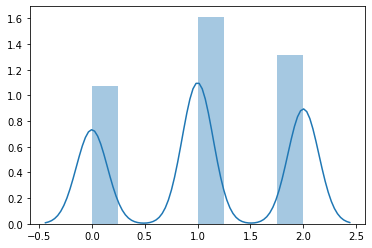

In [78]:
keep_row_count = single_y_count[0] * 1.5

    
remove_row_count = single_y_count[1] - keep_row_count
remove_index_list = []

count = 0

for i in range(y_train.shape[0]):
    if single_y[i] == 1:
        remove_index_list.append(i)
        count += 1
        if count >= remove_row_count:
            break
        
x_train = np.delete(x_train, remove_index_list , axis = 0)
y_train = np.delete(y_train, remove_index_list , axis = 0)

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    

for i in range(3):
    print('count for:',i,single_y_count[i])
    
sns.distplot(single_y)


In [79]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(64, input_shape=(data_size,), activation='relu'))
model.add( keras.layers.Dropout(0.5))
#output layer
model.add( keras.layers.Dense(3, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [80]:
fit_history = model.fit(x_train, y_train,
  epochs=300 ,
  batch_size=400,
  validation_data=(x_test,y_test)
)

Train on 4044 samples, validate on 2000 samples
Epoch 1/300
4044/4044 [==============================] - 0s 35us/sample - loss: 1.1334 - acc: 0.3727 - val_loss: 1.0008 - val_acc: 0.6820
Epoch 2/300
4044/4044 [==============================] - 0s 5us/sample - loss: 1.0785 - acc: 0.4275 - val_loss: 0.9686 - val_acc: 0.6800
Epoch 3/300
4044/4044 [==============================] - 0s 4us/sample - loss: 1.0261 - acc: 0.4963 - val_loss: 0.9443 - val_acc: 0.6780
Epoch 4/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.9758 - acc: 0.5470 - val_loss: 0.9070 - val_acc: 0.6825
Epoch 5/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.9317 - acc: 0.5910 - val_loss: 0.8769 - val_acc: 0.6985
Epoch 6/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.8950 - acc: 0.6137 - val_loss: 0.8428 - val_acc: 0.7125
Epoch 7/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.8590 - acc: 0.6407 - val_loss: 0.8160 - val_acc:

4044/4044 [==============================] - 0s 5us/sample - loss: 0.3376 - acc: 0.8615 - val_loss: 0.3617 - val_acc: 0.7770
Epoch 61/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.3322 - acc: 0.8709 - val_loss: 0.3591 - val_acc: 0.7785
Epoch 62/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.3301 - acc: 0.8702 - val_loss: 0.3596 - val_acc: 0.7835
Epoch 63/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.3267 - acc: 0.8741 - val_loss: 0.3525 - val_acc: 0.7875
Epoch 64/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.3191 - acc: 0.8749 - val_loss: 0.3444 - val_acc: 0.7965
Epoch 65/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.3270 - acc: 0.8756 - val_loss: 0.3511 - val_acc: 0.7895
Epoch 66/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.3230 - acc: 0.8781 - val_loss: 0.3451 - val_acc: 0.7985
Epoch 67/300
4044/4044 [=======================

4044/4044 [==============================] - 0s 5us/sample - loss: 0.2395 - acc: 0.9083 - val_loss: 0.2605 - val_acc: 0.8650
Epoch 120/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.2336 - acc: 0.9130 - val_loss: 0.2522 - val_acc: 0.8720
Epoch 121/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.2341 - acc: 0.9159 - val_loss: 0.2446 - val_acc: 0.8805
Epoch 122/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.2332 - acc: 0.9142 - val_loss: 0.2473 - val_acc: 0.8755
Epoch 123/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.2310 - acc: 0.9157 - val_loss: 0.2513 - val_acc: 0.8715
Epoch 124/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.2355 - acc: 0.9135 - val_loss: 0.2397 - val_acc: 0.8875
Epoch 125/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.2251 - acc: 0.9231 - val_loss: 0.2376 - val_acc: 0.8910
Epoch 126/300
4044/4044 [================

4044/4044 [==============================] - 0s 5us/sample - loss: 0.1894 - acc: 0.9350 - val_loss: 0.2013 - val_acc: 0.9115
Epoch 179/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1865 - acc: 0.9327 - val_loss: 0.1992 - val_acc: 0.9155
Epoch 180/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1910 - acc: 0.9313 - val_loss: 0.1961 - val_acc: 0.9175
Epoch 181/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1987 - acc: 0.9278 - val_loss: 0.1949 - val_acc: 0.9190
Epoch 182/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1873 - acc: 0.9332 - val_loss: 0.1942 - val_acc: 0.9190
Epoch 183/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1838 - acc: 0.9355 - val_loss: 0.2036 - val_acc: 0.9110
Epoch 184/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1841 - acc: 0.9340 - val_loss: 0.2008 - val_acc: 0.9150
Epoch 185/300
4044/4044 [================

4044/4044 [==============================] - 0s 4us/sample - loss: 0.1628 - acc: 0.9436 - val_loss: 0.1751 - val_acc: 0.9325
Epoch 238/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.1620 - acc: 0.9429 - val_loss: 0.1720 - val_acc: 0.9355
Epoch 239/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1599 - acc: 0.9407 - val_loss: 0.1699 - val_acc: 0.9355
Epoch 240/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.1592 - acc: 0.9446 - val_loss: 0.1692 - val_acc: 0.9365
Epoch 241/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.1575 - acc: 0.9441 - val_loss: 0.1684 - val_acc: 0.9350
Epoch 242/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.1582 - acc: 0.9426 - val_loss: 0.1719 - val_acc: 0.9330
Epoch 243/300
4044/4044 [==============================] - 0s 4us/sample - loss: 0.1635 - acc: 0.9379 - val_loss: 0.1708 - val_acc: 0.9355
Epoch 244/300
4044/4044 [================

4044/4044 [==============================] - 0s 4us/sample - loss: 0.1525 - acc: 0.9404 - val_loss: 0.1582 - val_acc: 0.9410
Epoch 297/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1426 - acc: 0.9523 - val_loss: 0.1546 - val_acc: 0.9420
Epoch 298/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1422 - acc: 0.9491 - val_loss: 0.1541 - val_acc: 0.9420
Epoch 299/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1398 - acc: 0.9488 - val_loss: 0.1589 - val_acc: 0.9395
Epoch 300/300
4044/4044 [==============================] - 0s 5us/sample - loss: 0.1470 - acc: 0.9454 - val_loss: 0.1571 - val_acc: 0.9400


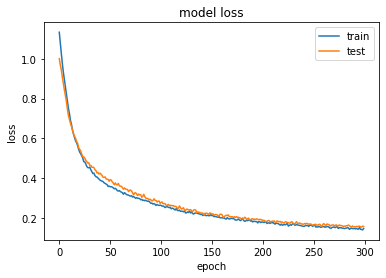

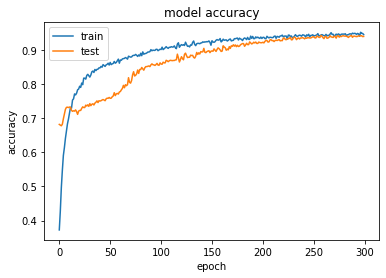

In [81]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

In [82]:
loss, acc = model.evaluate(x_val ,y_val)
print('acc:',acc , 'loss:',loss)

500/500 [==============================] - 0s 19us/sample - loss: 0.1450 - acc: 0.9340
acc: 0.934 loss: 0.14500550127029418


In [83]:
predictions = model.predict(x_val)
my_matrix = np.zeros( (3,3), dtype='int')

# count of good guesses
count_matrix = np.zeros( (3,), dtype='int')
good_matrix = np.zeros( (3,), dtype='int')

# iterate through 10,000 test data
for i in range(val.shape[0]):
    expected = np.argmax(y_val[i])
    count_matrix[expected] +=1
    guess = np.argmax(predictions[i])
    if guess == expected:
        good_matrix[guess] +=1
    else:
        my_matrix[expected][guess] +=1
    
# show good matrix
print('Good guesses: 0=effective, 1=no effect, 2=side effect')
for i in range(3):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses: 0=effective, 1=no effect, 2=side effect
match count for: 0 = 60 / 60 ( 100.00 %)
match count for: 1 = 338 / 368 ( 91.85 %)
match count for: 2 = 69 / 72 ( 95.83 %)


### the prediction result is a bit better


Confusion Matrix: 0=effective, 1=no effect, 2=side effect


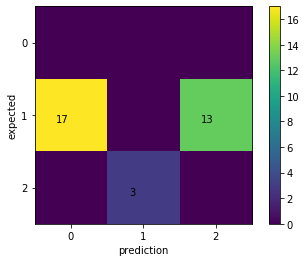

In [84]:
print('\nConfusion Matrix: 0=effective, 1=no effect, 2=side effect')

fig = plt.figure()
plt.xticks( range(3))
plt.yticks( range(3))

for y in range(3):
    for x in range(3):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix)
plt.colorbar()
plt.show()
plt.close()